# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
from collections import Counter
import numpy as np # linear algebra
import re
from re import findall
from datetime import datetime
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
#nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import os
from gensim.utils import simple_preprocess
from gensim import corpora
sw = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import seaborn as sns 
%matplotlib inline

init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_columns', 200)  # показывать больше колонок
RANDOM_SEED = 581321
CURRENT_DATE = pd.to_datetime('30/09/2021')
!pip freeze > requirements.txt

[nltk_data] Downloading package wordnet to /home/dafe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_main = pd.read_csv('main_task_new.csv')
print(df_main.info())
df_main.Reviews[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB
None


"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

In [3]:
####    Restaurant_id
df_output = df_main.copy()
def detectFranchise(count):
    if count > 1:
        return 1
    return 0
counts = df_output.Restaurant_id.value_counts().apply(detectFranchise)
countsPd = pd.Series(counts.values, counts.index).reset_index()
countsPd.columns=["Restaurant_id", "is_franchise"]
df_output = pd.merge(df_output, countsPd, on='Restaurant_id')
df_output

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,is_franchise
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1
1,id_5569,Madrid,"['Mediterranean', 'Spanish']",5572.0,4.0,$$ - $$$,24.0,"[['Excellent food and outstanding service', 'F...",/Restaurant_Review-g187514-d2001176-Reviews-Di...,d2001176,1
2,id_5569,Milan,"['Italian', 'Mediterranean', 'Vegetarian Frien...",5572.0,3.0,$$ - $$$,127.0,"[['Beautiful Place', 'Lovely place and atmosph...",/Restaurant_Review-g187849-d12429519-Reviews-L...,d12429519,1
3,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1
4,id_1535,Edinburgh,"['Italian', 'Pizza', 'Fast Food']",1540.0,3.5,$$ - $$$,44.0,"[['Tasty, tasty...very, very tasty!', 'Really ...",/Restaurant_Review-g186525-d787349-Reviews-Ani...,d787349,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,id_7836,London,"['Mexican', 'Latin', 'Fast Food', 'Spanish', '...",7845.0,4.0,$,40.0,"[['Give it a go if you like Mexican', 'Legit b...",/Restaurant_Review-g186338-d6524613-Reviews-La...,d6524613,0
39996,id_11658,London,"['Cafe', 'British', 'Vegetarian Friendly']",11668.0,3.5,$,43.0,"[['Good quality food at a reasonable price', '...",/Restaurant_Review-g186338-d8007793-Reviews-Be...,d8007793,0
39997,id_7068,London,"['Bar', 'British', 'Pub']",7077.0,4.0,$$ - $$$,41.0,"[['Great place !', 'Surprised by this hole in ...",/Restaurant_Review-g186338-d6373401-Reviews-Th...,d6373401,0
39998,id_8887,London,['International'],8896.0,5.0,NaN,NaN,"[['I love this place!'], ['08/24/2015']]",/Restaurant_Review-g186338-d5550626-Reviews-Th...,d5550626,0


In [4]:
# здесь обработка Cuisine_Style

df_output = df_main.copy()
df_output.columns = [column.replace(' ','_') for column in df_output.columns]
def list_unrar(list_of_lists):
        result=[]
        for lst in list_of_lists:
            result.extend(lst)
        return result
def categorize_cuisine(cuisines):
        cuisineCats = list()
        for cuisine in cuisines:
            if (cuisine in popular):
                cuisineCats.append("popular")
            elif (cuisine in niche):
                cuisineCats.append("niche")
            elif (cuisine in regular):
                cuisineCats.append("regular")
            else:
                cuisineCats.append(cuisine)
        return cuisineCats
scaler = MinMaxScaler()                                                      
df_output['Cuisine_Style'] = df_output['Cuisine_Style'].fillna("['isNaN']")
df_output['Cuisine_Style_uniq'] = df_output['Cuisine_Style'].str.findall(r"'(\b.*?\b)'")
df_output['Cuisine_Count'] = df_output.Cuisine_Style.apply(len)
df_output['Cuisine_Count'] = scaler.fit_transform(df_output[['Cuisine_Count']])
    
temp_list = df_output['Cuisine_Style_uniq'].tolist()
temp_counter=Counter(list_unrar(temp_list))
cuisine_counter = pd.DataFrame.from_dict(temp_counter, orient='index').reset_index()
cuisine_counter.columns = ['Cuisine', 'Count']                                                      
cuisine_counter['Percent'] = cuisine_counter.Count/cuisine_counter.Count.sum()
                                                      
niche = cuisine_counter.Cuisine[cuisine_counter.Percent <= 0.0002].tolist()
popular = cuisine_counter.Cuisine[cuisine_counter.Percent > 0.01].tolist()
popular.remove('isNaN')
regular = cuisine_counter.Cuisine[(cuisine_counter.Percent > 0.0002)&(cuisine_counter.Percent <= 0.01)].tolist()
    
df_output.Cuisine_Style_uniq = df_output.Cuisine_Style_uniq.apply(categorize_cuisine)
cuisine_dummy = pd.get_dummies(df_output.Cuisine_Style_uniq.apply(pd.Series).stack()).sum(level=0)
df_output = pd.concat([df_output,cuisine_dummy],axis=1)
df_output                                                 

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA,Cuisine_Style_uniq,Cuisine_Count,isNaN,niche,popular,regular
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,"[popular, popular, popular]",0.125000,0,0,3,0
1,id_1535,Stockholm,['isNaN'],1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,[isNaN],0.007812,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,"[popular, popular, popular, regular, popular, ...",0.371094,0,0,6,1
3,id_3456,Berlin,['isNaN'],3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,[isNaN],0.007812,1,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,"[regular, popular, popular]",0.179688,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,"[popular, popular, popular, popular]",0.261719,0,0,4,0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,"[popular, popular, popular, popular, popular]",0.222656,0,0,5,0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,"[popular, popular]",0.054688,0,0,2,0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,"[regular, popular, regular, popular, popular]",0.304688,0,0,3,2


In [5]:
##кагл V26 0.21379 или 0.210356875
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    df_output.columns = [column.replace(' ','_') for column in df_output.columns]
    scaler = MinMaxScaler()
    ################### 1. Предобработка ############################################################## 
    def scale(X):
        X_ = np.atleast_2d(X)
        return pd.DataFrame(scaler.fit_transform(X_), X.index)
    
    def price_range(x):
        if x=='$':
            return 'econom'
        elif x=='$$ - $$$':
            return 'regular'
        elif x=='$$$$':
            return 'luxury'
        return "isNaN"
    
    positive = ['good','great','nice','best','excel','delicio','love','delici','friendli','amaz','tasti',
                'atmospher','authent','fantast','quick''perfect','qualiti','wonder','cheap',
                'fresh','tast','surpris','cozi','reason','cosi','better','worth','famili','fast',
                'pleasant','awesom','super','like','real','beauti','relax','recommend','enjoy',
                'superb','special','yummi','welcom','cool','fabul','interest','healthi','quiet',
                'favourit','delight','high','brilliant','warm','favorit','charm','outstand','cute',
                'pricey','pretti','curri','happi','highli','ambianc','vibe','heart','comfort','incred',
                'modern','ambienc','fair','conveni','uniqu','surprisingli','clean','lover','heaven','chill',
                'sweet','fare','quirki','honest','genuin','class','true','attent','stylish','trendi','return',
                'popular','creativ','inexpens','flavor','romant','hospit','satisfi','atmosph','gorgeou','joint',
                'eleg','proper','usual','intim','treasur','gourmet','athen','truli','sure','reliabl','ideal',
                'ingredi','host','unusu','celebr','care','hearti','effici','perfectli','fanci','pleasur','smile',
                'thank','exquisit','fashion','paradis','refresh','pleasantli','jewel','lucki','freshli','fairli',
                'spectacular','innov','funki','magic','supper','unbeliev','feast','rustic','smoothi','entertain',
                'michelin','highlight','calm','ambient','posit','atmo','correct','inspir','dream','familiar','glad',
               'friendliest','greatest','nicest','wholesom','tranquil','comfi','attract','amazingli','frendli',
                'pleasent','flavoursom','yumm','excellen','atmosfer','luxuri','royal','freshest','perfecto','tremend',
                'deliciu','freindli','frindli','amateur','nicer','greater','brilliantli','coolest','respect','goood']
    negative = ['disapoint','dissapoint','worst','tasteless','rat','horribl','prici','crepe','problem','wast',
                'terribl','bore','mediocr','dissapoint','rude','overpric','disappoint','lack','noisi','slow',
                'expens','poor','disgust','avoid','trap','shame','unfriendli','bewar','dirti','unpleas','unpleas',
                'underwhelm','rubbish','weird','worthi','scam','poorli','expensi','complaint','cheater','dishonest',
                'unwelcom','nope','uninterest','rough','horrend','rudest','disrespect','horrif','pour','slowest',
                'jerk','impolit']
    neutral = ['averag','decent','ordinari','regular','simpl','alright','typic','okay','normal','casual','middl',
               'simpli','classi','standard']
    
    def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))  
    
    def preprocess(text):
        result=[]
        for token in gensim.utils.simple_preprocess(text) :
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        return result

    def text_category(cell):
        result = []
        if len(cell) == 0:
            result.append('no_review')
            return result
        for item in cell:
            if item in positive:
                result.append('positive')
            elif item in negative:
                result.append('negative')
            elif item in neutral:
                result.append('neutral')
        return result
    # функция для оценки текста
    def countCat(row):
        result = [0,0,0,0,0]
        columnSet = ['positive', 'negative', 'neutral', 'no_review', 'undetected']
        if not isinstance(row["Text_category"], list):
            result = [0,0,0,0,1]
            return pd.Series(result, index=columnSet)
        for cat in row["Text_category"]:
            for catIndex, catLabel in enumerate(columnSet):
                if (catLabel == cat):
                    result[catIndex] += 1
                    break
        return pd.Series(result, index=columnSet)
    
    def list_unrar(list_of_lists):
        result=[]
        for lst in list_of_lists:
            result.extend(lst)
        return result
    
    def categorize_cuisine(cuisines):
        cuisineCats = list()
        for cuisine in cuisines:
            if (cuisine in popular):
                cuisineCats.append("popular")
            elif (cuisine in niche):
                cuisineCats.append("niche")
            elif (cuisine in regular):
                cuisineCats.append("regular")
            else:
                cuisineCats.append(cuisine)
        return cuisineCats
    
    df_output['Reviews'] = df_output['Reviews'].fillna("[[], []]")
    df_output[['Text','Dates']] = df_output.Reviews.str.split(r'\], \[', n=1, expand=True) 
    df_output.Text = df_output.Text.str.lower()
    
    df_output.Dates = df_output.Dates.str.findall(r'\d{2}.\d{2}.\d{4}')
    df_output['Dates_num'] = df_output.Dates.apply(len)

    df_output[['Date1','Date2']] = pd.DataFrame(df_output.Dates.values.tolist(), index= df_output.index)
    df_output.Date1 = pd.to_datetime(df_output.Date1, format='%m/%d/%Y')      
    df_output.Date2 = pd.to_datetime(df_output.Date2, format='%m/%d/%Y') 

    df_output['Date_diff'] = abs(df_output.Date1 - df_output.Date2)
    df_output['Date_diff'] = df_output['Date_diff'].astype('timedelta64[D]')
    df_output['Interval'] = pd.cut(df_output['Date_diff'], bins=[0,30,90,365,3208], 
                                   labels=['in_month','in_3_month','in_1_year','more_year'],
                                   right=False)

    df_output.Interval = df_output.Interval.astype('category')
    df_output = pd.get_dummies(df_output, columns=['Interval'])

    df_output['Text_dirty_len'] = df_output['Text'].apply(len)
    df_output[['Text_dirty_len']] = scaler.fit_transform(df_output[['Text_dirty_len']])
    
    df_output['Text_clean'] = df_output['Text'].apply(lemmatize_stemming)
    df_output['Text_clean'] = df_output['Text'].apply(preprocess)
    
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)    
    df_output.Text_clean.loc[(df_output.Text_clean_len == 0)&(df_output.Dates_num != 0)]  = 'smile'
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)
    df_output[['Text_clean_len']] = scaler.fit_transform(df_output[['Text_clean_len']])
    df_output = pd.get_dummies(df_output, columns=['Dates_num'])
    df_output.drop(['Dates_num_0', 'Dates_num_2'], axis=1, inplace=True)
    
    df_output['Text_category'] = df_output.Text_clean.apply(text_category)
    df_output['Text_cat_len'] = df_output['Text_category'].apply(len)
    
    df_output.Text_category.loc[df_output.Text_cat_len == 0] = 'undetected'
   
    df_output = df_output.join(df_output.apply(countCat, axis=1))

    df_output.drop(['Text', 'Dates', 'Date1', 'Date2', 'Date_diff', 'Text_clean', 
                    'Text_category', 'Text_cat_len', 'Text_clean_len'], axis = 1, inplace=True)

    ####   Number_of_Reviews
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number_of_Reviews']).astype('uint8')
    grp = df_output.groupby(['City'])
    df_output.Number_of_Reviews = grp.Number_of_Reviews.apply(lambda x: x.fillna(x.median()))
    df_output['Number_of_Reviews'] = grp[['Number_of_Reviews']].apply(scale)
    
    ####   Price_Range                   
    
    
    df_output.Price_Range = df_output.Price_Range.apply(price_range)
    df_output = pd.get_dummies(df_output, columns=['Price_Range'])
    
    ####   Ranking, Rating 
    df_output['Ranking'] = grp[['Ranking']].apply(scale)
    
    ####   Cuisine_Style
    
    
    df_output['Cuisine_Style'] = df_output['Cuisine_Style'].fillna("['isNaN']")
    df_output['Cuisine_Style_uniq'] = df_output['Cuisine_Style'].str.findall(r"'(\b.*?\b)'")
        
    temp_list = df_output['Cuisine_Style_uniq'].tolist()
    temp_counter=Counter(list_unrar(temp_list))
    cuisine_counter = pd.DataFrame.from_dict(temp_counter, orient='index').reset_index()
    cuisine_counter.columns = ['Cuisine', 'Count']                                                      
    cuisine_counter['Percent'] = cuisine_counter.Count/cuisine_counter.Count.sum()
                                                      
    niche = cuisine_counter.Cuisine[cuisine_counter.Percent <= 0.0002].tolist()
    popular = cuisine_counter.Cuisine[cuisine_counter.Percent > 0.01].tolist()
    popular.remove('isNaN')
    regular = cuisine_counter.Cuisine[(cuisine_counter.Percent > 0.0002)&(cuisine_counter.Percent <= 0.01)].tolist()
  
    df_output.Cuisine_Style_uniq = df_output.Cuisine_Style_uniq.apply(categorize_cuisine)
    cuisine_dummy = pd.get_dummies(df_output.Cuisine_Style_uniq.apply(pd.Series).stack()).sum(level=0)
    df_output = pd.concat([df_output,cuisine_dummy],axis=1)
    
    ####   City
    df_output = pd.get_dummies(df_output, columns=['City'])
        
    ####    Restaurant_id

    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA'], axis = 1, inplace=True)
    

    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [6]:
###### draft
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    df_output.columns = [column.replace(' ','_') for column in df_output.columns]
    scaler = MinMaxScaler()
    ################### 1. Предобработка ############################################################## 
    def scale(X):
        X_ = np.atleast_2d(X)
        return pd.DataFrame(scaler.fit_transform(X_), X.index)
    
    def price_range(x):
        if x=='$':
            return 'econom'
        elif x=='$$ - $$$':
            return 'regular'
        elif x=='$$$$':
            return 'luxury'
        return "isNaN"
    
    positive = ['good','great','nice','best','excel','delicio','love','delici','friendli','amaz','tasti',
                'atmospher','authent','fantast','quick''perfect','qualiti','wonder','cheap',
                'fresh','tast','surpris','cozi','reason','cosi','better','worth','famili','fast',
                'pleasant','awesom','super','like','real','beauti','relax','recommend','enjoy',
                'superb','special','yummi','welcom','cool','fabul','interest','healthi','quiet',
                'favourit','delight','high','brilliant','warm','favorit','charm','outstand','cute',
                'pricey','pretti','curri','happi','highli','ambianc','vibe','heart','comfort','incred',
                'modern','ambienc','fair','conveni','uniqu','surprisingli','clean','lover','heaven','chill',
                'sweet','fare','quirki','honest','genuin','class','true','attent','stylish','trendi','return',
                'popular','creativ','inexpens','flavor','romant','hospit','satisfi','atmosph','gorgeou','joint',
                'eleg','proper','usual','intim','treasur','gourmet','athen','truli','sure','reliabl','ideal',
                'ingredi','host','unusu','celebr','care','hearti','effici','perfectli','fanci','pleasur','smile',
                'thank','exquisit','fashion','paradis','refresh','pleasantli','jewel','lucki','freshli','fairli',
                'spectacular','innov','funki','magic','supper','unbeliev','feast','rustic','smoothi','entertain',
                'michelin','highlight','calm','ambient','posit','atmo','correct','inspir','dream','familiar','glad',
               'friendliest','greatest','nicest','wholesom','tranquil','comfi','attract','amazingli','frendli',
                'pleasent','flavoursom','yumm','excellen','atmosfer','luxuri','royal','freshest','perfecto','tremend',
                'deliciu','freindli','frindli','amateur','nicer','greater','brilliantli','coolest','respect','goood']
    negative = ['disapoint','dissapoint','worst','tasteless','rat','horribl','prici','crepe','problem','wast',
                'terribl','bore','mediocr','dissapoint','rude','overpric','disappoint','lack','noisi','slow',
                'expens','poor','disgust','avoid','trap','shame','unfriendli','bewar','dirti','unpleas','unpleas',
                'underwhelm','rubbish','weird','worthi','scam','poorli','expensi','complaint','cheater','dishonest',
                'unwelcom','nope','uninterest','rough','horrend','rudest','disrespect','horrif','pour','slowest',
                'jerk','impolit']
    neutral = ['averag','decent','ordinari','regular','simpl','alright','typic','okay','normal','casual','middl',
               'simpli','classi','standard']
    
    def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))  
    
    def preprocess(text):
        result=[]
        for token in gensim.utils.simple_preprocess(text) :
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        return result

    def text_category(cell):
        result = []
        if len(cell) == 0:
            result.append('no_review')
            return result
        for item in cell:
            if item in positive:
                result.append('positive')
            elif item in negative:
                result.append('negative')
            elif item in neutral:
                result.append('neutral')
        return result
    # функция для оценки текста
    def countCat(row):
        result = [0,0,0,0,0]
        columnSet = ['positive', 'negative', 'neutral', 'no_review', 'undetected']
        if not isinstance(row["Text_category"], list):
            result = [0,0,0,0,1]
            return pd.Series(result, index=columnSet)
        for cat in row["Text_category"]:
            for catIndex, catLabel in enumerate(columnSet):
                if (catLabel == cat):
                    result[catIndex] += 1
                    break
        return pd.Series(result, index=columnSet)
    
    def list_unrar(list_of_lists):
        result=[]
        for lst in list_of_lists:
            result.extend(lst)
        return result
    
    def categorize_cuisine(cuisines):
        cuisineCats = list()
        for cuisine in cuisines:
            if (cuisine in popular):
                cuisineCats.append("popular")
            elif (cuisine in niche):
                cuisineCats.append("niche")
            elif (cuisine in regular):
                cuisineCats.append("regular")
            else:
                cuisineCats.append(cuisine)
        return cuisineCats
    
    ####    Restaurant_id
    def detectFranchise(count):
        if count > 1:
            return 1
        return 0
    counts = df_output.Restaurant_id.value_counts().apply(detectFranchise)
    countsPd = pd.Series(counts.values, counts.index).reset_index()
    countsPd.columns=["Restaurant_id", "is_franchise"]
    df_output = pd.merge(df_output, countsPd, on='Restaurant_id')
    
    #### Reviews - Text and Dates
    df_output['Reviews'] = df_output['Reviews'].fillna("[[], []]")
    df_output[['Text','Dates']] = df_output.Reviews.str.split(r'\], \[', n=1, expand=True) 
    df_output.Text = df_output.Text.str.lower()
    
    df_output.Dates = df_output.Dates.str.findall(r'\d{2}.\d{2}.\d{4}')
    df_output['Dates_num'] = df_output.Dates.apply(len)

    df_output[['Date1','Date2']] = pd.DataFrame(df_output.Dates.values.tolist(), index= df_output.index)
    df_output.Date1 = pd.to_datetime(df_output.Date1, format='%m/%d/%Y')      
    df_output.Date2 = pd.to_datetime(df_output.Date2, format='%m/%d/%Y') 

    df_output['Date_diff'] = abs(df_output.Date1 - df_output.Date2)
    df_output['Date_diff'] = df_output['Date_diff'].astype('timedelta64[D]')
    df_output['Interval'] = pd.cut(df_output['Date_diff'], bins=[0,30,90,365,3208], 
                                   labels=['in_month','in_3_month','in_1_year','more_year'],
                                   right=False)

    df_output.Interval = df_output.Interval.astype('category')
    df_output = pd.get_dummies(df_output, columns=['Interval'])

    df_output['Text_dirty_len'] = df_output['Text'].apply(len)
    df_output[['Text_dirty_len']] = scaler.fit_transform(df_output[['Text_dirty_len']])
    
    df_output['Text_clean'] = df_output['Text'].apply(lemmatize_stemming)
    df_output['Text_clean'] = df_output['Text'].apply(preprocess)
    
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)    
    df_output.Text_clean.loc[(df_output.Text_clean_len == 0)&(df_output.Dates_num != 0)]  = 'smile'
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)
    df_output[['Text_clean_len']] = scaler.fit_transform(df_output[['Text_clean_len']])
    df_output = pd.get_dummies(df_output, columns=['Dates_num'])
    df_output.drop(['Dates_num_0', 'Dates_num_2'], axis=1, inplace=True)
    
    df_output['Text_category'] = df_output.Text_clean.apply(text_category)
    df_output['Text_cat_len'] = df_output['Text_category'].apply(len)
    
    df_output.Text_category.loc[df_output.Text_cat_len == 0] = 'undetected'
   
    df_output = df_output.join(df_output.apply(countCat, axis=1))

    df_output.drop(['Text', 'Dates', 'Date1', 'Date2', 'Date_diff', 'Text_clean', 
                    'Text_category', 'Text_cat_len', 'Text_clean_len'], axis = 1, inplace=True)

    ####   Number_of_Reviews
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number_of_Reviews']).astype('uint8')
    grp = df_output.groupby(['City'])
    df_output.Number_of_Reviews = grp.Number_of_Reviews.apply(lambda x: x.fillna(x.median()))
    df_output['Number_of_Reviews'] = grp[['Number_of_Reviews']].apply(scale)
    
    ####   Price_Range                   
    df_output.Price_Range = df_output.Price_Range.apply(price_range)
    df_output = pd.get_dummies(df_output, columns=['Price_Range'])
    
    ####   Ranking
    df_output['Ranking'] = grp[['Ranking']].apply(scale)
    
    ####   Cuisine_Style   
    df_output['Cuisine_Style'] = df_output['Cuisine_Style'].fillna("['isNaN']")
    df_output['Cuisine_Style_uniq'] = df_output['Cuisine_Style'].str.findall(r"'(\b.*?\b)'")
        
    temp_list = df_output['Cuisine_Style_uniq'].tolist()
    temp_counter=Counter(list_unrar(temp_list))
    cuisine_counter = pd.DataFrame.from_dict(temp_counter, orient='index').reset_index()
    cuisine_counter.columns = ['Cuisine', 'Count']                                                      
    cuisine_counter['Percent'] = cuisine_counter.Count/cuisine_counter.Count.sum()
                                                      
    niche = cuisine_counter.Cuisine[cuisine_counter.Percent <= 0.0002].tolist()
    popular = cuisine_counter.Cuisine[cuisine_counter.Percent > 0.01].tolist()
    popular.remove('isNaN')
    regular = cuisine_counter.Cuisine[(cuisine_counter.Percent > 0.0002)&(cuisine_counter.Percent <= 0.01)].tolist()
  
    df_output.Cuisine_Style_uniq = df_output.Cuisine_Style_uniq.apply(categorize_cuisine)
    cuisine_dummy = pd.get_dummies(df_output.Cuisine_Style_uniq.apply(pd.Series).stack()).sum(level=0)
    df_output = pd.concat([df_output,cuisine_dummy],axis=1)
    
    ####   City
    df_output = pd.get_dummies(df_output, columns=['City'])
        

    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA'], axis = 1, inplace=True)
    

    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [7]:
df = df_main.copy()
def detectFranchise(count):
    if count > 1:
        return 1
    return 0
counts = df.Restaurant_id.value_counts().apply(detectFranchise)
countsPd = pd.Series(counts.values, counts.index).reset_index()
countsPd.columns=["Restaurant_id", "is_franchise"]
df = df.merge(countsPd, how='left')
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,is_franchise
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1


In [8]:
df = df_main.copy()
df['code_Restaurant_id'] = df['Restaurant_id'].apply(lambda x: float(x[3:]))
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,code_Restaurant_id
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,5569.0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1535.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,352.0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3456.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,615.0
...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,499.0
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,6340.0
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1649.0
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,640.0


In [9]:
### попробую проверить последовательно влияние моих переменных на МАЕ
## 1. только dummies городов. МАЕ = 0.3342575
## 2. плюс обработка Number_of_Reviews. МАЕ = 0.21572949
## 3. применим масштабирование к Ranking. МАЕ = 0.211855
## 4. определим франшизу по Restaurant_ID. МАЕ = 0.21573499 - уберем детекцию франшизы
## 5. обработка Price_Range. МАЕ = 0.20984 - оставим признак
## 6. проведем анализ Review
### 6.1 dummies для количества дат, очистка и анализ слов текста ревью. MAE: 0.21022949
### 6.2 плюс dummies для интервалов между датами. 0.2097165
### 6.3 уберем анализ слов текстовой части 0.209052
### 6.4 чуть отредактирую слова в списках 0.2095524
### 6.5 еще поудаляла сомнительные слова в списке positive MAE: 0.20946099
## 7. добавим призннак с населением в городах Population MAE: 0.2082165
## 8. вернем детекцию франшизы не путая индексы при добавлении MAE: 0.2087625
## 9. добавим исследование кухонь MAE: 0.2085855
## 10. добавим признак Ranking/Population уже масштабированные

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    df_output.columns = [column.replace(' ','_') for column in df_output.columns]
    
    scaler = MinMaxScaler()
    ###функция для масштабирования сгруппированных признаков
    def scale(X):
        X_ = np.atleast_2d(X)
        return pd.DataFrame(scaler.fit_transform(X_), X.index)
    ###функция для определения ценовой категории
    def price_range(x):
        if x=='$':
            return 'econom'
        elif x=='$$ - $$$':
            return 'regular'
        elif x=='$$$$':
            return 'luxury'
        return "isNaN"
    ##списки слов из текста Review
    positive = ['good','great','nice','best','excel','delicio','love','delici','friendli','amaz','tasti',
                'atmospher','authent','fantast','quick''perfect','qualiti','wonder',
                'fresh','tast','surpris','cozi','reason','cosi','worth','famili','fast',
                'pleasant','awesom','super','like','real','beauti','relax','recommend','enjoy',
                'superb','special','yummi','welcom','cool','fabul','healthi','quiet',
                'favourit','delight','high','brilliant','warm','favorit','charm','outstand','cute',
                'pricey','pretti','curri','happi','highli','ambianc','vibe','heart','comfort','incred',
                'modern','ambienc','fair','conveni','uniqu','surprisingli','clean','lover','heaven','chill',
                'sweet','fare','quirki','honest','genuin','class','true','attent','stylish','trendi','return',
                'popular','creativ','inexpens','flavor','romant','hospit','satisfi','atmosph','gorgeou','joint',
                'eleg','proper','intim','treasur','gourmet','athen','truli','sure','reliabl','ideal',
                'ingredi','host','unusu','celebr','hearti','effici','perfectli','fanci','pleasur','smile',
                'thank','exquisit','fashion','paradis','pleasantli','jewel','lucki','freshli','fairli',
                'spectacular','innov','funki','magic','supper','unbeliev','feast','rustic','smoothi','entertain',
                'michelin','highlight','calm','ambient','posit','atmo','correct','inspir','dream','familiar','glad',
               'friendliest','greatest','nicest','wholesom','tranquil','comfi','attract','amazingli','frendli',
                'pleasent','flavoursom','yumm','excellen','atmosfer','luxuri','royal','freshest','perfecto','tremend',
                'deliciu','freindli','frindli','amateur','nicer','greater','brilliantli','coolest','respect','goood']
    negative = ['disapoint','dissapoint','worst','tasteless','rat','horribl','crepe','problem','wast',
                'terribl','bore','mediocr','dissapoint','rude','overpric','disappoint','lack','noisi',
                'expens','poor','disgust','avoid','trap','shame','unfriendli','bewar','dirti','unpleas','unpleas',
                'underwhelm','rubbish','weird','worthi','scam','poorli','expensi','complaint','cheater','dishonest',
                'unwelcom','nope','uninterest','rough','horrend','rudest','disrespect','horrif','pour','slowest',
                'jerk','impolit']
    neutral = ['averag','decent','ordinari','regular','simpl','alright','typic','okay','normal','casual','middl',
               'simpli','standard']
    ##функция для сокращения слов в их корневую форму
    def lemmatize_stemming(text):
        return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))  
    ##функция для удаления шумовых слов из текста
    def preprocess(text):
        result=[]
        for token in gensim.utils.simple_preprocess(text) :
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        return result
    ##функция для анализа слов в тексте
    def text_category(cell):
        result = []
        if len(cell) == 0:
            result.append('no_review')
            return result
        for item in cell:
            if item in positive:
                result.append('positive')
            elif item in negative:
                result.append('negative')
            elif item in neutral:
                result.append('neutral')
        return result
    # функция для выведения категорий текста в столбцы
    def countCat(row):
        result = [0,0,0,0,0]
        columnSet = ['positive', 'negative', 'neutral', 'no_review', 'undetected']
        if not isinstance(row["Text_category"], list):
            result = [0,0,0,0,1]
            return pd.Series(result, index=columnSet)
        for cat in row["Text_category"]:
            for catIndex, catLabel in enumerate(columnSet):
                if (catLabel == cat):
                    result[catIndex] += 1
                    break
        return pd.Series(result, index=columnSet)
    
    #### Добавим признак для сетевых ресторанов
    def detectFranchise(count):
        if count > 1:
            return 1
        return 0

    counts = df_output.Restaurant_id.value_counts().apply(detectFranchise)
    countsPd = pd.Series(counts.values, counts.index).reset_index()
    countsPd.columns=["Restaurant_id", "is_franchise"]
    df_output = df_output.merge(countsPd, how='left')
    #### Добавим признак с населением
    city_dict = {'Paris': 2148.327, 'Helsinki':656.611, 'Edinburgh':488.1, 'London':8961.989, 
                 'Bratislava':437.725,'Lisbon':505.526,'Budapest':1752.286, 'Stockholm':961.609, 
                 'Rome':2870.500, 'Milan':1378.689, 'Munich':1471.508,'Hamburg':1841.179,
                 'Prague':1335.084, 'Vienna':1897.491, 'Dublin':1173.179, 'Barcelona':1664.182, 
                 'Brussels':185.103,'Madrid':3266.126,'Oslo':673.469, 'Amsterdam':872.757, 
                 'Berlin':3644.826, 'Lyon': 506.615, 'Athens':664.046, 'Warsaw':1789.620,
                 'Oporto':231.962, 'Krakow':769.307, 'Copenhagen':1358.608, 'Luxembourg':636.739, 
                 'Zurich':1407.572, 'Geneva':620.131,'Ljubljana':284.355}
    pop_df = pd.Series(city_dict).to_frame().reset_index()
    pop_df.columns = ['City','Population']
    df_output = df_output.merge(pop_df, how='left')
            
    df_output[['Population']] = scaler.fit_transform(df_output[['Population']])
    
    ####   Cuisine_Style   
    df_output['Cuisine_Style'] = df_output['Cuisine_Style'].fillna("['isNaN']")
    df_output['Cuisine_Style_uniq'] = df_output['Cuisine_Style'].str.findall(r"'(\b.*?\b)'")
        
    temp_list = df_output['Cuisine_Style_uniq'].tolist()
    temp_counter=Counter(list_unrar(temp_list))
    cuisine_counter = pd.DataFrame.from_dict(temp_counter, orient='index').reset_index()
    cuisine_counter.columns = ['Cuisine', 'Count']                                                      
    cuisine_counter['Percent'] = cuisine_counter.Count/cuisine_counter.Count.sum()
                                                      
    niche = cuisine_counter.Cuisine[cuisine_counter.Percent <= 0.0002].tolist()
    popular = cuisine_counter.Cuisine[cuisine_counter.Percent > 0.01].tolist()
    popular.remove('isNaN')
    regular = cuisine_counter.Cuisine[(cuisine_counter.Percent > 0.0002)&(cuisine_counter.Percent <= 0.01)].tolist()
  
    df_output.Cuisine_Style_uniq = df_output.Cuisine_Style_uniq.apply(categorize_cuisine)
    cuisine_dummy = pd.get_dummies(df_output.Cuisine_Style_uniq.apply(pd.Series).stack()).sum(level=0)
    df_output = pd.concat([df_output,cuisine_dummy],axis=1)
    
    #### Reviews - Text and Dates
    df_output['Reviews'] = df_output['Reviews'].fillna("[[], []]")
    df_output[['Text','Dates']] = df_output.Reviews.str.split(r'\], \[', n=1, expand=True) 
    df_output.Text = df_output.Text.str.lower()
    
    df_output.Dates = df_output.Dates.str.findall(r'\d{2}.\d{2}.\d{4}')
    df_output['Dates_num'] = df_output.Dates.apply(len)

    df_output[['Date1','Date2']] = pd.DataFrame(df_output.Dates.values.tolist(), index= df_output.index)
    df_output.Date1 = pd.to_datetime(df_output.Date1, format='%m/%d/%Y')      
    df_output.Date2 = pd.to_datetime(df_output.Date2, format='%m/%d/%Y') 

    df_output['Date_diff'] = abs(df_output.Date1 - df_output.Date2)
    df_output['Date_diff'] = df_output['Date_diff'].astype('timedelta64[D]')
    df_output['Interval'] = pd.cut(df_output['Date_diff'], bins=[0,30,90,365,3208], 
                                   labels=['in_month','in_3_month','in_1_year','more_year'],
                                   right=False)

    df_output.Interval = df_output.Interval.astype('category')
    df_output = pd.get_dummies(df_output, columns=['Interval'])

    df_output['Text_dirty_len'] = df_output['Text'].apply(len)
    df_output[['Text_dirty_len']] = scaler.fit_transform(df_output[['Text_dirty_len']])
    
    df_output['Text_clean'] = df_output['Text'].apply(lemmatize_stemming)
    df_output['Text_clean'] = df_output['Text'].apply(preprocess)
    
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)    
    df_output.Text_clean.loc[(df_output.Text_clean_len == 0)&(df_output.Dates_num != 0)]  = 'smile'
    df_output['Text_clean_len'] = df_output['Text_clean'].apply(len)
    
    df_output = pd.get_dummies(df_output, columns=['Dates_num'])
    df_output.drop(['Dates_num_0', 'Dates_num_2'], axis=1, inplace=True)
    
    df_output['Text_category'] = df_output.Text_clean.apply(text_category)
    df_output['Text_cat_len'] = df_output['Text_category'].apply(len)
    
    df_output.Text_category.loc[df_output.Text_cat_len == 0] = 'undetected'
   
    df_output = df_output.join(df_output.apply(countCat, axis=1))

    df_output.drop(['Text_cat_len', 'Text_clean_len'], axis = 1, inplace=True)
    
    ####   Price_Range
    df_output.Price_Range = df_output.Price_Range.apply(price_range)
    df_output = pd.get_dummies(df_output, columns=['Price_Range'])
    
    ####   Ranking
    grp = df_output.groupby(['City'])
    df_output['Ranking'] = grp[['Ranking']].apply(scale)
    
    ####   Number_of_Reviews
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number_of_Reviews']).astype('uint8')
    grp = df_output.groupby(['City'])
    df_output.Number_of_Reviews = grp.Number_of_Reviews.apply(lambda x: x.fillna(x.median()))
    df_output['Number_of_Reviews'] = grp[['Number_of_Reviews']].apply(scale)
    
   
    ####   City
    df_output = pd.get_dummies(df_output, columns=['City'])
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA','Date1','Date2','Date_diff'], axis = 1, inplace=True)
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [10]:
df = preproc_data(df_main)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  40000 non-null  float64
 1   Rating                   40000 non-null  float64
 2   Number_of_Reviews        40000 non-null  float64
 3   is_franchise             40000 non-null  int64  
 4   Population               40000 non-null  float64
 5   isNaN                    40000 non-null  uint8  
 6   niche                    40000 non-null  uint8  
 7   popular                  40000 non-null  uint8  
 8   regular                  40000 non-null  uint8  
 9   Interval_in_month        40000 non-null  uint8  
 10  Interval_in_3_month      40000 non-null  uint8  
 11  Interval_in_1_year       40000 non-null  uint8  
 12  Interval_more_year       40000 non-null  uint8  
 13  Text_dirty_len           40000 non-null  float64
 14  Dates_num_1           

In [11]:
data = df.iloc[:,:24].copy()
corrs = data.corr()
corrs.columns
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.update_layout(
    autosize=False,
    width=1000,
    height=600)
figure.show()

In [12]:
df_rat_by_city = df.loc[:, ['Rating', 'City_Amsterdam','City_Athens','City_Barcelona','City_Berlin',
                            'City_Bratislava','City_Brussels','City_Budapest','City_Copenhagen',
                            'City_Dublin','City_Edinburgh','City_Geneva','City_Hamburg','City_Helsinki',
                            'City_Krakow','City_Lisbon','City_Ljubljana','City_London','City_Luxembourg',
                            'City_Lyon','City_Madrid','City_Milan','City_Munich','City_Oporto','City_Oslo',
                            'City_Paris','City_Prague','City_Rome' ,'City_Stockholm' ,'City_Vienna' ,
                            'City_Warsaw' ,'City_Zurich']] 
data = df_rat_by_city.copy()
corrs = data.corr()
corrs.columns
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.update_layout(
    autosize=False,
    width=1200,
    height=800,)
figure.show()

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [13]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis = 1)
y = df['Rating']

In [14]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [15]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [16]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [17]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


In [18]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2085855


<AxesSubplot:>

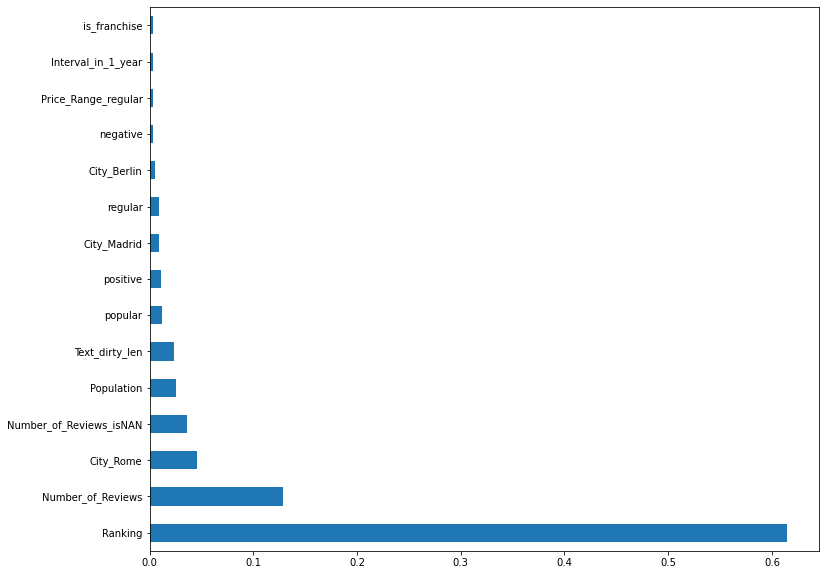

In [20]:
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [22]:
list_ofAllColumnsSortImportant = list(feat_importances.nlargest(len(df.columns)-1).index)
MAE = 0.2085855
min_MAE = round(MAE,3)
print(f"min_MAE = {min_MAE}")
remove_list = []
log = []
delta =0.002
for i in range(0,len(list_ofAllColumnsSortImportant),1):
    col = list_ofAllColumnsSortImportant[i]
    print(f"{i}.{col}")
    ###

    y = df.Rating.values            # наш таргет
    X = df.drop(['Rating']+[col], axis=1)


#     # Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
#     # выделим 20% данных на валидацию (параметр test_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
    print(df.shape, y.shape, X.shape, X_train.shape, X_test.shape)

    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)

    temp_MAE = metrics.mean_absolute_error(y_test, y_pred)
#     ###
    print(temp_MAE)
    log.append([col, temp_MAE])
    if round(temp_MAE,3) <= min_MAE-delta:
        remove_list.append(col)
        print(f"удаляем:= {col}")
    else:
        print(f"не удаляем:= {col}")
print(f"i={i}")
print(f"remove_list: {remove_list}")
print(f"log_list: {log}")

min_MAE = 0.209
0.Ranking
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.45941871763931014
не удаляем:= Ranking
1.Number_of_Reviews
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.27505874999999996
не удаляем:= Number_of_Reviews
2.City_Rome
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20997375
не удаляем:= City_Rome
3.Number_of_Reviews_isNAN
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.211875
не удаляем:= Number_of_Reviews_isNAN
4.Population
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


0.20936124999999997
не удаляем:= Population
5.Text_dirty_len
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20816749999999998
не удаляем:= Text_dirty_len
6.popular
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


0.2089575
не удаляем:= popular
7.positive
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.2086175
не удаляем:= positive
8.City_Madrid
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.208749375
не удаляем:= City_Madrid
9.regular
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.208846875
не удаляем:= regular
10.City_Berlin
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20992562499999998
не удаляем:= City_Berlin
11.negative
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20898375
не удаляем:= negative
12.Price_Range_regular
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209195
не удаляем:= Price_Range_regular
13.Interval_in_1_year
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20900124999999997
не удаляем:= Interval_in_1_year
14.is_franchise
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20866812499999998
не удаляем:= is_franchise
15.Price_Range_isNaN
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209156875
не удаляем:= Price_Range_isNaN
16.City_Zurich
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209694375
не удаляем:= City_Zurich
17.Interval_in_month
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20871749999999997
не удаляем:= Interval_in_month
18.Price_Range_econom
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20912562499999998
не удаляем:= Price_Range_econom
19.City_Amsterdam
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20940062499999998
не удаляем:= City_Amsterdam
20.Interval_more_year
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20888749999999998
не удаляем:= Interval_more_year
21.City_Barcelona
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20893937499999998
не удаляем:= City_Barcelona
22.City_Hamburg
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.2092
не удаляем:= City_Hamburg
23.City_Milan
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20974374999999998
не удаляем:= City_Milan
24.Interval_in_3_month
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20871749999999997
не удаляем:= Interval_in_3_month
25.City_Paris
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20918937499999998
не удаляем:= City_Paris
26.isNaN
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20897999999999997
не удаляем:= isNaN
27.Dates_num_1
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20876874999999995
не удаляем:= Dates_num_1
28.undetected
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20852125
не удаляем:= undetected
29.City_Oporto
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20918062499999998
не удаляем:= City_Oporto
30.City_Athens
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20932499999999998
не удаляем:= City_Athens
31.City_Warsaw
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209171875
не удаляем:= City_Warsaw
32.City_Edinburgh
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20904312499999997
не удаляем:= City_Edinburgh
33.City_Prague
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20938187499999997
не удаляем:= City_Prague
34.neutral
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.208830625
не удаляем:= neutral
35.City_Copenhagen
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20934499999999998
не удаляем:= City_Copenhagen
36.no_review
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20892562499999998
не удаляем:= no_review
37.City_Vienna
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20921125000000002
не удаляем:= City_Vienna
38.City_London
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


0.208864375
не удаляем:= City_London
39.City_Budapest
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209301875
не удаляем:= City_Budapest
40.City_Krakow
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.209301875
не удаляем:= City_Krakow
41.City_Munich
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20913187499999997
не удаляем:= City_Munich
42.Price_Range_luxury
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.208983125
не удаляем:= Price_Range_luxury
43.City_Lyon
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20879562499999998
не удаляем:= City_Lyon
44.City_Lisbon
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209003125
не удаляем:= City_Lisbon
45.City_Stockholm
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20891125
не удаляем:= City_Stockholm
46.City_Ljubljana
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20901999999999998
не удаляем:= City_Ljubljana
47.City_Bratislava
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.2090025
не удаляем:= City_Bratislava
48.City_Luxembourg
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.20884875
не удаляем:= City_Luxembourg
49.City_Dublin
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.209296875
не удаляем:= City_Dublin
50.City_Geneva
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20895187499999998
не удаляем:= City_Geneva
51.City_Oslo
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.20900562499999997
не удаляем:= City_Oslo
52.niche
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


0.20868875
не удаляем:= niche
53.City_Brussels
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


0.208843125
не удаляем:= City_Brussels
54.City_Helsinki
(40000, 56) (40000,) (40000, 54) (32000, 54) (8000, 54)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s


0.208825625
не удаляем:= City_Helsinki
i=54
remove_list: []
log_list: [['Ranking', 0.45941871763931014], ['Number_of_Reviews', 0.27505874999999996], ['City_Rome', 0.20997375], ['Number_of_Reviews_isNAN', 0.211875], ['Population', 0.20936124999999997], ['Text_dirty_len', 0.20816749999999998], ['popular', 0.2089575], ['positive', 0.2086175], ['City_Madrid', 0.208749375], ['regular', 0.208846875], ['City_Berlin', 0.20992562499999998], ['negative', 0.20898375], ['Price_Range_regular', 0.209195], ['Interval_in_1_year', 0.20900124999999997], ['is_franchise', 0.20866812499999998], ['Price_Range_isNaN', 0.209156875], ['City_Zurich', 0.209694375], ['Interval_in_month', 0.20871749999999997], ['Price_Range_econom', 0.20912562499999998], ['City_Amsterdam', 0.20940062499999998], ['Interval_more_year', 0.20888749999999998], ['City_Barcelona', 0.20893937499999998], ['City_Hamburg', 0.2092], ['City_Milan', 0.20974374999999998], ['Interval_in_3_month', 0.20871749999999997], ['City_Paris', 0.20918937499

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
